# 1.) Intial Comparsion 

In [6]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway

In [8]:
# Reading in total Alzheimer’s sample data 
df = pd.read_csv('Total_AD.csv')

In [10]:
# Checking dataframe 
df.head()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Prostaglandin-H2 D-isomerase OS=Homo sapiens GN=PTGDS PE=1 SV=1,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Pancreatic alpha-amylase OS=Homo sapiens GN=AMY2A PE=1 SV=2,Alpha-amylase 1 OS=Homo sapiens GN=AMY1A PE=1 SV=2,Basement membrane-specific heparan sulfate proteoglycan core protein OS=Homo sapiens GN=HSPG2 PE=1 SV=4,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-amylase 2B OS=Homo sapiens GN=AMY2B PE=1 SV=1,...,Protein-lysine 6-oxidase OS=Homo sapiens GN=LOX PE=1 SV=2,Interleukin-1 receptor accessory protein OS=Homo sapiens GN=IL1RAP PE=1 SV=2,Isoform 6 of PR domain zinc finger protein 10 OS=Homo sapiens GN=PRDM10,Ig heavy chain V-III region LAY OS=Homo sapiens PE=1 SV=1,Tumor necrosis factor receptor superfamily member 1A OS=Homo sapiens GN=TNFRSF1A PE=1 SV=1,A disintegrin and metalloproteinase with thrombospondin motifs 2 OS=Homo sapiens GN=ADAMTS2 PE=2 SV=2,Myosin light chain 3 OS=Homo sapiens GN=MYL3 PE=1 SV=3,Kit ligand OS=Homo sapiens GN=KITLG PE=1 SV=1,Anoctamin-8 OS=Homo sapiens GN=ANO8 PE=1 SV=3,Alzheimer’s
0,637.85,571.87,606.48,17.91,10.94,8.47,7.48,0.31,20.80,8.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,427.77,598.26,129.46,4.84,29.28,7.03,7.48,0.28,17.53,7.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,225.54,897.79,59.46,8.07,7.02,3.64,3.64,0.16,50.08,3.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,32.41,499.46,59.46,5.76,3.51,2.94,2.53,0.17,27.95,2.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1029.88,4155.44,216.85,6.83,8.57,9.00,10.16,0.24,72.57,8.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


I am going to be checking how many zeros exists within my sample rows 
The goal of this project is to identify universal biomarkers (proteins shared 
across most if not all members of the experimental group/AD patients) that can be used to detect
AD in the larger population. If there are proteins that are only exist 1 or 2 patients then it wouldn't be a good biomarker of interest to measure within the larger population because it rarely showed up in 
the sample I have. But I will have to acknowledge that with a larger patient sample the proteins of interest may change.

In [13]:
zero_counts_per_row = (df == 0).sum(axis=1)

In [15]:
print(zero_counts_per_row)

0     1022
1      928
2     1056
3      993
4      999
5     1094
6     1069
7     1000
8      941
9     1058
10    1337
11    1491
12    1215
13    1187
14    1176
15    1139
16    1409
17    1095
18    1183
dtype: int64


In [17]:
# I am setting a threshold for zeros because I want to exclude columns where 
# more than 40% of their data is 0, this is an arbitrary value I came up with 
# but I figured if a protein is present within at least 60% percent of our sample group
# it requires further exploration.  
threshold = 0.4
zero_ratio_per_column = (df == 0).sum() / len(df)
columns_to_keep = zero_ratio_per_column[zero_ratio_per_column < threshold].index
filtered_df = df[columns_to_keep]

In [19]:
# Checking the dataframe created after filtering out the columns over threshold 
filtered_df.head()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Prostaglandin-H2 D-isomerase OS=Homo sapiens GN=PTGDS PE=1 SV=1,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Pancreatic alpha-amylase OS=Homo sapiens GN=AMY2A PE=1 SV=2,Alpha-amylase 1 OS=Homo sapiens GN=AMY1A PE=1 SV=2,Basement membrane-specific heparan sulfate proteoglycan core protein OS=Homo sapiens GN=HSPG2 PE=1 SV=4,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-amylase 2B OS=Homo sapiens GN=AMY2B PE=1 SV=1,...,Hyaluronidase-1 OS=Homo sapiens GN=HYAL1 PE=1 SV=2,Annexin A2 OS=Homo sapiens GN=ANXA2 PE=1 SV=2,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Alpha-galactosidase A OS=Homo sapiens GN=GLA PE=1 SV=1,Melanoma inhibitory activity protein 3 OS=Homo sapiens GN=MIA3 PE=1 SV=1,Putative elongation factor 1-alpha-like 3 OS=Homo sapiens GN=EEF1A1P5 PE=5 SV=1,Opioid-binding protein/cell adhesion molecule OS=Homo sapiens GN=OPCML PE=1 SV=1,T-cell antigen CD7 OS=Homo sapiens GN=CD7 PE=1 SV=1,Alpha-2-macroglobulin OS=Homo sapiens GN=A2M PE=1 SV=3,Alzheimer’s
0,637.85,571.87,606.48,17.91,10.94,8.47,7.48,0.31,20.80,8.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1,427.77,598.26,129.46,4.84,29.28,7.03,7.48,0.28,17.53,7.06,...,0.14,0.18,0.73,0.14,0.02,0.13,0.09,0.13,0.00,1
2,225.54,897.79,59.46,8.07,7.02,3.64,3.64,0.16,50.08,3.65,...,0.14,3.01,8.03,0.21,0.02,0.13,0.09,0.00,0.00,1
3,32.41,499.46,59.46,5.76,3.51,2.94,2.53,0.17,27.95,2.35,...,0.07,0.28,0.73,0.00,0.02,0.46,0.09,0.13,0.04,1
4,1029.88,4155.44,216.85,6.83,8.57,9.00,10.16,0.24,72.57,8.00,...,0.14,0.50,0.73,0.07,0.02,0.07,0.09,0.13,0.57,1


In [21]:
filtered_df.tail()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Prostaglandin-H2 D-isomerase OS=Homo sapiens GN=PTGDS PE=1 SV=1,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Pancreatic alpha-amylase OS=Homo sapiens GN=AMY2A PE=1 SV=2,Alpha-amylase 1 OS=Homo sapiens GN=AMY1A PE=1 SV=2,Basement membrane-specific heparan sulfate proteoglycan core protein OS=Homo sapiens GN=HSPG2 PE=1 SV=4,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-amylase 2B OS=Homo sapiens GN=AMY2B PE=1 SV=1,...,Hyaluronidase-1 OS=Homo sapiens GN=HYAL1 PE=1 SV=2,Annexin A2 OS=Homo sapiens GN=ANXA2 PE=1 SV=2,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Alpha-galactosidase A OS=Homo sapiens GN=GLA PE=1 SV=1,Melanoma inhibitory activity protein 3 OS=Homo sapiens GN=MIA3 PE=1 SV=1,Putative elongation factor 1-alpha-like 3 OS=Homo sapiens GN=EEF1A1P5 PE=5 SV=1,Opioid-binding protein/cell adhesion molecule OS=Homo sapiens GN=OPCML PE=1 SV=1,T-cell antigen CD7 OS=Homo sapiens GN=CD7 PE=1 SV=1,Alpha-2-macroglobulin OS=Homo sapiens GN=A2M PE=1 SV=3,Alzheimer’s
14,336.54,102.45,35.21,4.84,3.31,2.34,2.16,0.12,19.93,2.35,...,0.07,0.00,140.36,0.07,0.00,0.00,0.09,0.00,0.08,1
15,192.14,436.21,45.79,9.51,5.72,4.78,4.78,0.23,7.24,5.13,...,0.14,0.00,0.00,0.07,0.03,0.07,0.00,0.13,0.00,1
16,588.88,2114.01,129.46,13.10,27.97,8.47,7.96,0.25,54.39,9.04,...,0.00,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.32,1
17,128.63,1474.12,129.46,9.51,6.02,3.16,2.94,0.28,33.05,3.41,...,0.22,2.14,26.14,0.47,0.02,0.07,0.09,0.13,0.02,1
18,1115.46,784.19,469.10,38.44,12.05,3.90,2.94,0.20,61.56,3.65,...,0.00,0.00,0.73,0.00,0.02,0.07,0.00,0.13,0.22,1


In [23]:
filtered_df.shape

(19, 437)

#### Data went from previous size (19, 1740) to (19, 437)

In [23]:
filtered_df.describe()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Prostaglandin-H2 D-isomerase OS=Homo sapiens GN=PTGDS PE=1 SV=1,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Pancreatic alpha-amylase OS=Homo sapiens GN=AMY2A PE=1 SV=2,Alpha-amylase 1 OS=Homo sapiens GN=AMY1A PE=1 SV=2,Basement membrane-specific heparan sulfate proteoglycan core protein OS=Homo sapiens GN=HSPG2 PE=1 SV=4,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-amylase 2B OS=Homo sapiens GN=AMY2B PE=1 SV=1,...,Hyaluronidase-1 OS=Homo sapiens GN=HYAL1 PE=1 SV=2,Annexin A2 OS=Homo sapiens GN=ANXA2 PE=1 SV=2,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Alpha-galactosidase A OS=Homo sapiens GN=GLA PE=1 SV=1,Melanoma inhibitory activity protein 3 OS=Homo sapiens GN=MIA3 PE=1 SV=1,Putative elongation factor 1-alpha-like 3 OS=Homo sapiens GN=EEF1A1P5 PE=5 SV=1,Opioid-binding protein/cell adhesion molecule OS=Homo sapiens GN=OPCML PE=1 SV=1,T-cell antigen CD7 OS=Homo sapiens GN=CD7 PE=1 SV=1,Alpha-2-macroglobulin OS=Homo sapiens GN=A2M PE=1 SV=3,Alzheimer’s
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,432.046316,3272.982632,183.471579,11.618421,10.827368,6.670526,5.742632,0.206316,36.098947,6.192632,...,0.120526,0.456316,10.050526,0.110000,0.014211,0.082632,0.066316,0.082105,0.117368,1.0
std,370.235384,10706.774474,182.135127,8.743068,7.963567,4.860276,3.382652,0.071741,43.109398,4.216934,...,0.135009,0.799918,32.150013,0.128149,0.011698,0.115222,0.058804,0.064427,0.184928,0.0
min,11.830000,7.690000,5.020000,0.550000,1.120000,0.550000,0.550000,0.040000,3.480000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,208.840000,392.130000,59.460000,6.295000,5.870000,3.640000,3.165000,0.155000,14.700000,3.530000,...,0.035000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,336.540000,522.520000,129.460000,9.510000,8.570000,5.810000,5.450000,0.220000,20.800000,5.130000,...,0.070000,0.180000,0.730000,0.070000,0.020000,0.070000,0.090000,0.130000,0.040000,1.0
75%,588.880000,918.495000,216.850000,13.100000,14.035000,8.470000,7.720000,0.265000,45.390000,8.000000,...,0.140000,0.500000,2.010000,0.210000,0.020000,0.070000,0.090000,0.130000,0.100000,1.0
max,1308.520000,47313.830000,606.480000,38.440000,29.280000,21.750000,14.500000,0.310000,193.710000,18.410000,...,0.580000,3.010000,140.360000,0.470000,0.030000,0.460000,0.180000,0.130000,0.600000,1.0


In [26]:
# Reading in the total control/healthy samples 
df2 = pd.read_csv('Total_HV.csv')

In [28]:
# Checking the dataframe
df2.head()

,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-1-antitrypsin OS=Homo sapiens GN=SERPINA1 PE=1 SV=3,Ig gamma-1 chain C region OS=Homo sapiens GN=IGHG1 PE=1 SV=1,Prothrombin OS=Homo sapiens GN=F2 PE=1 SV=2,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,Ig gamma-2 chain C region OS=Homo sapiens GN=IGHG2 PE=1 SV=2,...,Zinc finger homeobox protein 3 OS=Homo sapiens GN=ZFHX3 PE=1 SV=2,Neurexin-3 OS=Homo sapiens GN=NRXN3 PE=1 SV=4,RB1-inducible coiled-coil protein 1 OS=Homo sapiens GN=RB1CC1 PE=1 SV=3,Alpha-lactalbumin OS=Homo sapiens GN=LALBA PE=1 SV=1,Isoform 2 of Noelin-3 OS=Homo sapiens GN=OLFM3,Interleukin-10 receptor subunit beta OS=Homo sapiens GN=IL10RB PE=1 SV=2,Ubiquitin-conjugating enzyme E2 D2 OS=Homo sapiens GN=UBE2D2 PE=1 SV=1,Peripherin OS=Homo sapiens GN=PRPH PE=1 SV=2,Isoform 2 of Serine/threonine-protein kinase PAK 4 OS=Homo sapiens GN=PAK4,Alzheimer’s
0,716.56,19.32,208.18,280.52,72.57,44.24,16.42,1.57,8.18,11.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4155.44,12.64,101.05,99.96,61.56,58.40,7.71,1.69,4.10,10.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,456.35,10.43,427.77,469.10,20.80,7.25,11.32,1.24,19.06,8.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,221.47,16.79,463.37,45.79,8.30,6.71,2.66,1.35,7.60,1.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,303.93,15.29,310.67,216.85,17.53,11.41,4.65,1.05,5.21,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
df2.tail()

,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-1-antitrypsin OS=Homo sapiens GN=SERPINA1 PE=1 SV=3,Ig gamma-1 chain C region OS=Homo sapiens GN=IGHG1 PE=1 SV=1,Prothrombin OS=Homo sapiens GN=F2 PE=1 SV=2,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,Ig gamma-2 chain C region OS=Homo sapiens GN=IGHG2 PE=1 SV=2,...,Zinc finger homeobox protein 3 OS=Homo sapiens GN=ZFHX3 PE=1 SV=2,Neurexin-3 OS=Homo sapiens GN=NRXN3 PE=1 SV=4,RB1-inducible coiled-coil protein 1 OS=Homo sapiens GN=RB1CC1 PE=1 SV=3,Alpha-lactalbumin OS=Homo sapiens GN=LALBA PE=1 SV=1,Isoform 2 of Noelin-3 OS=Homo sapiens GN=OLFM3,Interleukin-10 receptor subunit beta OS=Homo sapiens GN=IL10RB PE=1 SV=2,Ubiquitin-conjugating enzyme E2 D2 OS=Homo sapiens GN=UBE2D2 PE=1 SV=1,Peripherin OS=Homo sapiens GN=PRPH PE=1 SV=2,Isoform 2 of Serine/threonine-protein kinase PAK 4 OS=Homo sapiens GN=PAK4,Alzheimer’s
14,14022.60,17.60,286.78,280.52,82.09,29.07,11.32,1.35,7.60,4.68,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0
15,684.95,29.28,1534.97,167.59,30.40,12.29,10.30,1.69,12.57,7.04,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0
16,18373.83,12.64,336.54,129.46,257.62,38.48,7.71,0.79,4.10,7.77,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0
17,4346.93,12.64,163.67,99.96,35.93,2.90,6.99,0.88,7.60,4.68,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0
18,1474.12,12.64,192.14,167.59,23.62,3.79,9.36,0.96,6.55,2.68,...,0.01,0.02,0.02,0.2,0.12,0.09,0.2,0.06,0.07,0


In [32]:
# Checking the number of zeros within the rows, will not remove like I did with 
# The AD because I will only be comparing the column values present in the filtered dataframe
zero_counts_per_row = (df2 == 0).sum(axis=1)

In [34]:
print(zero_counts_per_row)

0      902
1     1045
2      804
3      911
4      908
5     1037
6     1072
7      925
8     1071
9      925
10     827
11     849
12    1083
13     936
14     897
15     900
16    1048
17    1030
18     857
dtype: int64


In [36]:
# Looking for columns shared within the two groups, should be around 400
shared_columns = filtered_df.columns.intersection(df2.columns).tolist()

In [38]:
len(shared_columns)

437

#### I chose to create a dataframe of both the AD and the HV with only the columns that intersect (columns found in the filtered Alzheimer’s sample dataframe and the healthy control) then concatenating them into one target dataset. 

In [41]:
isolated_df = pd.DataFrame(filtered_df[x] for x in shared_columns)

In [43]:
isolated2_df = pd.DataFrame(df2[x] for x in shared_columns)

#### Checking df shape for both sample groups. 

In [47]:
isolated_df.shape

(437, 19)

In [49]:
isolated2_df.shape

(437, 19)

In [51]:
# Inverting the df so that proteins are our column name and each row corresponds to a single urine sample
Tisolated_df = isolated_df.T
Tisolated2_df = isolated2_df.T

#### Checking both dfs head and tail to make sure everything looks correct 

In [54]:
Tisolated_df.head()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Prostaglandin-H2 D-isomerase OS=Homo sapiens GN=PTGDS PE=1 SV=1,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Pancreatic alpha-amylase OS=Homo sapiens GN=AMY2A PE=1 SV=2,Alpha-amylase 1 OS=Homo sapiens GN=AMY1A PE=1 SV=2,Basement membrane-specific heparan sulfate proteoglycan core protein OS=Homo sapiens GN=HSPG2 PE=1 SV=4,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-amylase 2B OS=Homo sapiens GN=AMY2B PE=1 SV=1,...,Hyaluronidase-1 OS=Homo sapiens GN=HYAL1 PE=1 SV=2,Annexin A2 OS=Homo sapiens GN=ANXA2 PE=1 SV=2,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Alpha-galactosidase A OS=Homo sapiens GN=GLA PE=1 SV=1,Melanoma inhibitory activity protein 3 OS=Homo sapiens GN=MIA3 PE=1 SV=1,Putative elongation factor 1-alpha-like 3 OS=Homo sapiens GN=EEF1A1P5 PE=5 SV=1,Opioid-binding protein/cell adhesion molecule OS=Homo sapiens GN=OPCML PE=1 SV=1,T-cell antigen CD7 OS=Homo sapiens GN=CD7 PE=1 SV=1,Alpha-2-macroglobulin OS=Homo sapiens GN=A2M PE=1 SV=3,Alzheimer’s
0,637.85,571.87,606.48,17.91,10.94,8.47,7.48,0.31,20.80,8.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
1,427.77,598.26,129.46,4.84,29.28,7.03,7.48,0.28,17.53,7.06,...,0.14,0.18,0.73,0.14,0.02,0.13,0.09,0.13,0.00,1.0
2,225.54,897.79,59.46,8.07,7.02,3.64,3.64,0.16,50.08,3.65,...,0.14,3.01,8.03,0.21,0.02,0.13,0.09,0.00,0.00,1.0
3,32.41,499.46,59.46,5.76,3.51,2.94,2.53,0.17,27.95,2.35,...,0.07,0.28,0.73,0.00,0.02,0.46,0.09,0.13,0.04,1.0
4,1029.88,4155.44,216.85,6.83,8.57,9.00,10.16,0.24,72.57,8.00,...,0.14,0.50,0.73,0.07,0.02,0.07,0.09,0.13,0.57,1.0


In [56]:
Tisolated_df.tail()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Prostaglandin-H2 D-isomerase OS=Homo sapiens GN=PTGDS PE=1 SV=1,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Pancreatic alpha-amylase OS=Homo sapiens GN=AMY2A PE=1 SV=2,Alpha-amylase 1 OS=Homo sapiens GN=AMY1A PE=1 SV=2,Basement membrane-specific heparan sulfate proteoglycan core protein OS=Homo sapiens GN=HSPG2 PE=1 SV=4,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-amylase 2B OS=Homo sapiens GN=AMY2B PE=1 SV=1,...,Hyaluronidase-1 OS=Homo sapiens GN=HYAL1 PE=1 SV=2,Annexin A2 OS=Homo sapiens GN=ANXA2 PE=1 SV=2,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Alpha-galactosidase A OS=Homo sapiens GN=GLA PE=1 SV=1,Melanoma inhibitory activity protein 3 OS=Homo sapiens GN=MIA3 PE=1 SV=1,Putative elongation factor 1-alpha-like 3 OS=Homo sapiens GN=EEF1A1P5 PE=5 SV=1,Opioid-binding protein/cell adhesion molecule OS=Homo sapiens GN=OPCML PE=1 SV=1,T-cell antigen CD7 OS=Homo sapiens GN=CD7 PE=1 SV=1,Alpha-2-macroglobulin OS=Homo sapiens GN=A2M PE=1 SV=3,Alzheimer’s
14,336.54,102.45,35.21,4.84,3.31,2.34,2.16,0.12,19.93,2.35,...,0.07,0.00,140.36,0.07,0.00,0.00,0.09,0.00,0.08,1.0
15,192.14,436.21,45.79,9.51,5.72,4.78,4.78,0.23,7.24,5.13,...,0.14,0.00,0.00,0.07,0.03,0.07,0.00,0.13,0.00,1.0
16,588.88,2114.01,129.46,13.10,27.97,8.47,7.96,0.25,54.39,9.04,...,0.00,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.32,1.0
17,128.63,1474.12,129.46,9.51,6.02,3.16,2.94,0.28,33.05,3.41,...,0.22,2.14,26.14,0.47,0.02,0.07,0.09,0.13,0.02,1.0
18,1115.46,784.19,469.10,38.44,12.05,3.90,2.94,0.20,61.56,3.65,...,0.00,0.00,0.73,0.00,0.02,0.07,0.00,0.13,0.22,1.0


In [58]:
Tisolated2_df.head()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Prostaglandin-H2 D-isomerase OS=Homo sapiens GN=PTGDS PE=1 SV=1,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Pancreatic alpha-amylase OS=Homo sapiens GN=AMY2A PE=1 SV=2,Alpha-amylase 1 OS=Homo sapiens GN=AMY1A PE=1 SV=2,Basement membrane-specific heparan sulfate proteoglycan core protein OS=Homo sapiens GN=HSPG2 PE=1 SV=4,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-amylase 2B OS=Homo sapiens GN=AMY2B PE=1 SV=1,...,Hyaluronidase-1 OS=Homo sapiens GN=HYAL1 PE=1 SV=2,Annexin A2 OS=Homo sapiens GN=ANXA2 PE=1 SV=2,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Alpha-galactosidase A OS=Homo sapiens GN=GLA PE=1 SV=1,Melanoma inhibitory activity protein 3 OS=Homo sapiens GN=MIA3 PE=1 SV=1,Putative elongation factor 1-alpha-like 3 OS=Homo sapiens GN=EEF1A1P5 PE=5 SV=1,Opioid-binding protein/cell adhesion molecule OS=Homo sapiens GN=OPCML PE=1 SV=1,T-cell antigen CD7 OS=Homo sapiens GN=CD7 PE=1 SV=1,Alpha-2-macroglobulin OS=Homo sapiens GN=A2M PE=1 SV=3,Alzheimer’s
0,208.18,716.56,280.52,9.51,19.32,5.45,5.10,0.22,72.57,4.49,...,0.07,0.09,2.01,0.07,0.02,0.13,0.00,0.13,0.24,0.0
1,101.05,4155.44,99.96,4.84,12.64,4.78,5.10,0.14,61.56,4.49,...,0.07,0.28,0.00,0.07,0.00,0.13,0.09,0.00,0.17,0.0
2,427.77,456.35,469.10,13.10,10.43,2.94,2.94,0.23,20.80,2.95,...,0.14,1.67,8.03,0.00,0.00,0.00,0.09,0.13,0.06,0.0
3,463.37,221.47,45.79,8.07,16.79,4.47,4.18,0.22,8.30,4.49,...,0.14,0.77,0.00,0.14,0.02,0.00,0.28,0.13,0.02,0.0
4,310.67,303.93,216.85,4.84,15.29,7.96,7.03,0.18,17.53,7.06,...,0.00,1.67,4.21,0.00,0.00,0.13,0.18,0.13,0.06,0.0


In [60]:
Tisolated2_df.tail()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Prostaglandin-H2 D-isomerase OS=Homo sapiens GN=PTGDS PE=1 SV=1,Uromodulin OS=Homo sapiens GN=UMOD PE=1 SV=1,Pancreatic alpha-amylase OS=Homo sapiens GN=AMY2A PE=1 SV=2,Alpha-amylase 1 OS=Homo sapiens GN=AMY1A PE=1 SV=2,Basement membrane-specific heparan sulfate proteoglycan core protein OS=Homo sapiens GN=HSPG2 PE=1 SV=4,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Alpha-amylase 2B OS=Homo sapiens GN=AMY2B PE=1 SV=1,...,Hyaluronidase-1 OS=Homo sapiens GN=HYAL1 PE=1 SV=2,Annexin A2 OS=Homo sapiens GN=ANXA2 PE=1 SV=2,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Alpha-galactosidase A OS=Homo sapiens GN=GLA PE=1 SV=1,Melanoma inhibitory activity protein 3 OS=Homo sapiens GN=MIA3 PE=1 SV=1,Putative elongation factor 1-alpha-like 3 OS=Homo sapiens GN=EEF1A1P5 PE=5 SV=1,Opioid-binding protein/cell adhesion molecule OS=Homo sapiens GN=OPCML PE=1 SV=1,T-cell antigen CD7 OS=Homo sapiens GN=CD7 PE=1 SV=1,Alpha-2-macroglobulin OS=Homo sapiens GN=A2M PE=1 SV=3,Alzheimer’s
14,286.78,14022.60,280.52,3.35,17.60,4.78,3.39,0.18,82.09,3.92,...,0.14,0.50,0.73,0.14,0.00,0.21,0.18,0.13,0.24,0.0
15,1534.97,684.95,167.59,38.44,29.28,5.45,4.78,0.26,30.40,5.47,...,0.07,0.00,0.73,0.38,0.00,0.07,0.09,0.13,0.00,0.0
16,336.54,18373.83,129.46,6.83,12.64,3.90,3.90,0.12,257.62,3.92,...,0.00,0.77,2.01,0.00,0.03,0.07,0.09,0.13,0.00,0.0
17,163.67,4346.93,99.96,2.75,12.64,3.90,4.47,0.17,35.93,4.19,...,0.00,2.41,26.14,0.00,0.00,0.00,0.09,0.00,0.27,0.0
18,192.14,1474.12,167.59,4.84,12.64,2.34,2.53,0.21,23.62,2.74,...,0.07,3.73,14.65,0.07,0.00,0.07,0.09,0.13,0.19,0.0


In [62]:
# Calculating the mean values for each column of the alzheimer’s patients as well as the 
# healthy control in order to find proteins with the most variance as potential proteins of interest
AD_mean = Tisolated_df.mean()

In [64]:
HV_mean = Tisolated2_df.mean()

#### I am going to create a dataframe of these differences and look at the 10 highest and lowest values

In [67]:
mean = pd.DataFrame(AD_mean - HV_mean, columns=['mean_difference'])

In [69]:
mean.sort_values(by = ['mean_difference'], ascending=False).head(10)

,mean_difference
Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,15.063684
Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,7.068947
Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,6.239474
Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,4.607368
Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,3.909474
Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,3.734211
Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,3.683684
Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,2.721053
CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,2.180000
Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,2.155263


In [71]:
mean.sort_values(by = ['mean_difference'], ascending=False).tail(10)

,mean_difference
Protein S100-A8 OS=Homo sapiens GN=S100A8 PE=1 SV=1,-7.470526
Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,-7.645263
Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,-13.276316
Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,-16.317895
Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,-17.773684
Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,-32.037895
Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,-47.807368
Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,-50.800000
Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,-71.074211
Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,-398.935263


#### I created a variable I can reference with the names of the 20 proteins identified and the target column

In [74]:
proteins_of_interest = ['Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1',
'Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1',
'Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2',
'Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1',
'Isoform B of Osteopontin OS=Homo sapiens GN=SPP1',
'Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3',
'Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1',
'Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1',
'CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1',
'Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1',
'Protein S100-A8 OS=Homo sapiens GN=S100A8 PE=1 SV=1',
'Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1',
'Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2',
'Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1',
'Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1',
'Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3',
'Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1',
'Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2',
'Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2',
'Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2', 'Alzheimer’s']

In [76]:
# Creating a dataframe of those 21 columns for both data sample groups 
hv = Tisolated2_df[proteins_of_interest]
ad = Tisolated_df[proteins_of_interest]

#### checking their shapes heads and tails before combining them, they should both have 19 patients each and 21 columns (Twenty Proteins and the target column)

In [79]:
hv.shape

(19, 21)

In [81]:
ad.shape

(19, 21)

In [83]:
hv.head()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
0,208.18,12.55,2.01,6.77,6.08,5.81,0.00,0.00,6.95,8.18,...,66.53,16.34,0.00,22.64,72.57,280.52,1.72,716.56,13.52,0.0
1,101.05,10.73,0.00,3.05,0.00,1.35,3.17,0.00,8.79,4.10,...,22.56,3.78,3.95,19.72,61.56,99.96,0.49,4155.44,4.59,0.0
2,427.77,14.67,8.03,9.28,0.00,1.35,0.00,0.44,6.95,19.06,...,29.65,29.12,18.47,9.72,20.80,469.10,2.33,456.35,16.58,0.0
3,463.37,19.93,0.00,0.00,0.00,0.77,4.96,1.99,6.95,7.60,...,12.91,0.74,5.22,3.26,8.30,45.79,3.96,221.47,11.00,0.0
4,310.67,9.15,4.21,0.00,8.36,1.35,8.31,1.99,6.95,5.21,...,12.91,0.32,23.47,3.86,17.53,216.85,5.06,303.93,16.58,0.0


In [85]:
ad.head()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
0,637.85,36.35,0.00,2.69,2.36,3.14,2.49,1.49,11.04,10.16,...,22.56,0.20,0.26,22.64,20.80,606.48,0.22,571.87,4.59,1.0
1,427.77,23.19,0.73,49.12,36.89,1.35,37.79,0.44,11.04,14.46,...,17.10,0.10,8.81,6.22,17.53,129.46,0.22,598.26,1.15,1.0
2,225.54,19.93,8.03,6.08,5.45,0.64,6.12,0.44,6.95,6.55,...,17.10,0.45,18.47,8.40,50.08,59.46,0.49,897.79,4.59,1.0
3,32.41,3.92,0.73,4.35,0.00,80.83,3.98,45.44,13.82,4.81,...,9.69,6.57,8.81,2.27,27.95,59.46,0.22,499.46,8.91,1.0
4,1029.88,19.93,0.73,11.38,0.00,0.64,0.00,3.32,17.23,16.61,...,50.90,0.45,5.22,34.10,72.57,216.85,3.06,4155.44,13.52,1.0


In [87]:
hv.tail()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
14,286.78,19.93,0.73,25.10,18.74,0.90,18.00,0.44,8.79,7.60,...,12.91,0.58,23.47,11.23,82.09,280.52,740.71,14022.60,6578.09,0.0
15,1534.97,23.19,0.73,8.36,7.53,2.35,7.51,0.73,11.04,12.57,...,86.87,35.20,0.26,29.76,30.40,167.59,0.49,684.95,7.19,0.0
16,336.54,10.73,2.01,6.08,5.45,0.24,0.00,0.20,11.04,4.10,...,29.65,26.47,95.32,58.46,257.62,129.46,0.49,18373.83,0.47,0.0
17,163.67,4.68,26.14,4.35,0.00,0.15,4.45,0.73,8.79,7.60,...,17.10,0.20,47.55,8.40,35.93,99.96,0.49,4346.93,0.21,0.0
18,192.14,12.55,14.65,13.92,0.00,0.90,13.54,1.08,6.95,6.55,...,17.10,1.09,378.16,9.72,23.62,167.59,0.49,1474.12,3.61,0.0


In [89]:
ad.tail()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
14,336.54,7.78,140.36,2.36,0.00,0.15,2.19,0.00,6.95,4.45,...,22.56,29.12,151.08,7.24,19.93,35.21,0.22,102.45,0.21,1.0
15,192.14,23.19,0.00,12.59,10.28,3.77,10.12,0.73,11.04,19.06,...,9.69,2.63,1.49,4.55,7.24,45.79,3.96,436.21,8.91,1.0
16,588.88,26.96,0.00,30.45,25.10,1.18,26.15,2.59,11.04,11.71,...,12.91,4.24,11.33,29.76,54.39,129.46,0.00,2114.01,5.76,1.0
17,128.63,23.19,26.14,30.45,22.78,0.90,28.68,1.08,13.82,25.04,...,22.56,3.78,14.50,4.55,33.05,129.46,1.23,1474.12,7.19,1.0
18,1115.46,31.32,0.73,16.98,13.92,0.33,14.89,0.44,6.95,5.21,...,50.90,13.42,1.49,76.39,61.56,469.10,0.00,784.19,0.00,1.0


In [91]:
# joining both dataframes and ignoring the index
target = pd.concat([ad,hv], ignore_index=True)

In [93]:
# checking for errors
target.head()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
0,637.85,36.35,0.00,2.69,2.36,3.14,2.49,1.49,11.04,10.16,...,22.56,0.20,0.26,22.64,20.80,606.48,0.22,571.87,4.59,1.0
1,427.77,23.19,0.73,49.12,36.89,1.35,37.79,0.44,11.04,14.46,...,17.10,0.10,8.81,6.22,17.53,129.46,0.22,598.26,1.15,1.0
2,225.54,19.93,8.03,6.08,5.45,0.64,6.12,0.44,6.95,6.55,...,17.10,0.45,18.47,8.40,50.08,59.46,0.49,897.79,4.59,1.0
3,32.41,3.92,0.73,4.35,0.00,80.83,3.98,45.44,13.82,4.81,...,9.69,6.57,8.81,2.27,27.95,59.46,0.22,499.46,8.91,1.0
4,1029.88,19.93,0.73,11.38,0.00,0.64,0.00,3.32,17.23,16.61,...,50.90,0.45,5.22,34.10,72.57,216.85,3.06,4155.44,13.52,1.0


In [95]:
target.tail()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
33,286.78,19.93,0.73,25.10,18.74,0.90,18.00,0.44,8.79,7.60,...,12.91,0.58,23.47,11.23,82.09,280.52,740.71,14022.60,6578.09,0.0
34,1534.97,23.19,0.73,8.36,7.53,2.35,7.51,0.73,11.04,12.57,...,86.87,35.20,0.26,29.76,30.40,167.59,0.49,684.95,7.19,0.0
35,336.54,10.73,2.01,6.08,5.45,0.24,0.00,0.20,11.04,4.10,...,29.65,26.47,95.32,58.46,257.62,129.46,0.49,18373.83,0.47,0.0
36,163.67,4.68,26.14,4.35,0.00,0.15,4.45,0.73,8.79,7.60,...,17.10,0.20,47.55,8.40,35.93,99.96,0.49,4346.93,0.21,0.0
37,192.14,12.55,14.65,13.92,0.00,0.90,13.54,1.08,6.95,6.55,...,17.10,1.09,378.16,9.72,23.62,167.59,0.49,1474.12,3.61,0.0


#### Saving joined dataframe to target csv

In [98]:
target.to_csv('Target.csv', index=False)

# 2.) Visualization 

In [102]:
graphing = target.T

In [106]:
graphing.head(2)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,637.85,427.77,225.54,32.41,1029.88,1308.52,588.88,244.35,394.91,286.78,...,244.35,588.88,877.90,139.39,877.90,286.78,1534.97,336.54,163.67,192.14
Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,36.35,23.19,19.93,3.92,19.93,42.17,31.32,31.32,17.11,19.93,...,9.15,23.19,31.32,12.55,23.19,19.93,23.19,10.73,4.68,12.55


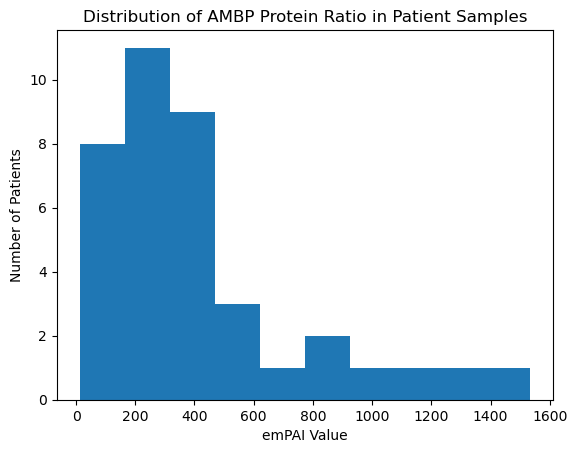

In [113]:
plt.hist(target['Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1'])
plt.title('Distribution of AMBP Protein Ratio in Patient Samples')
plt.xlabel('emPAI Value')
plt.ylabel('Number of Patients')
plt.savefig('Protein AMBP Distributions')
plt.show();

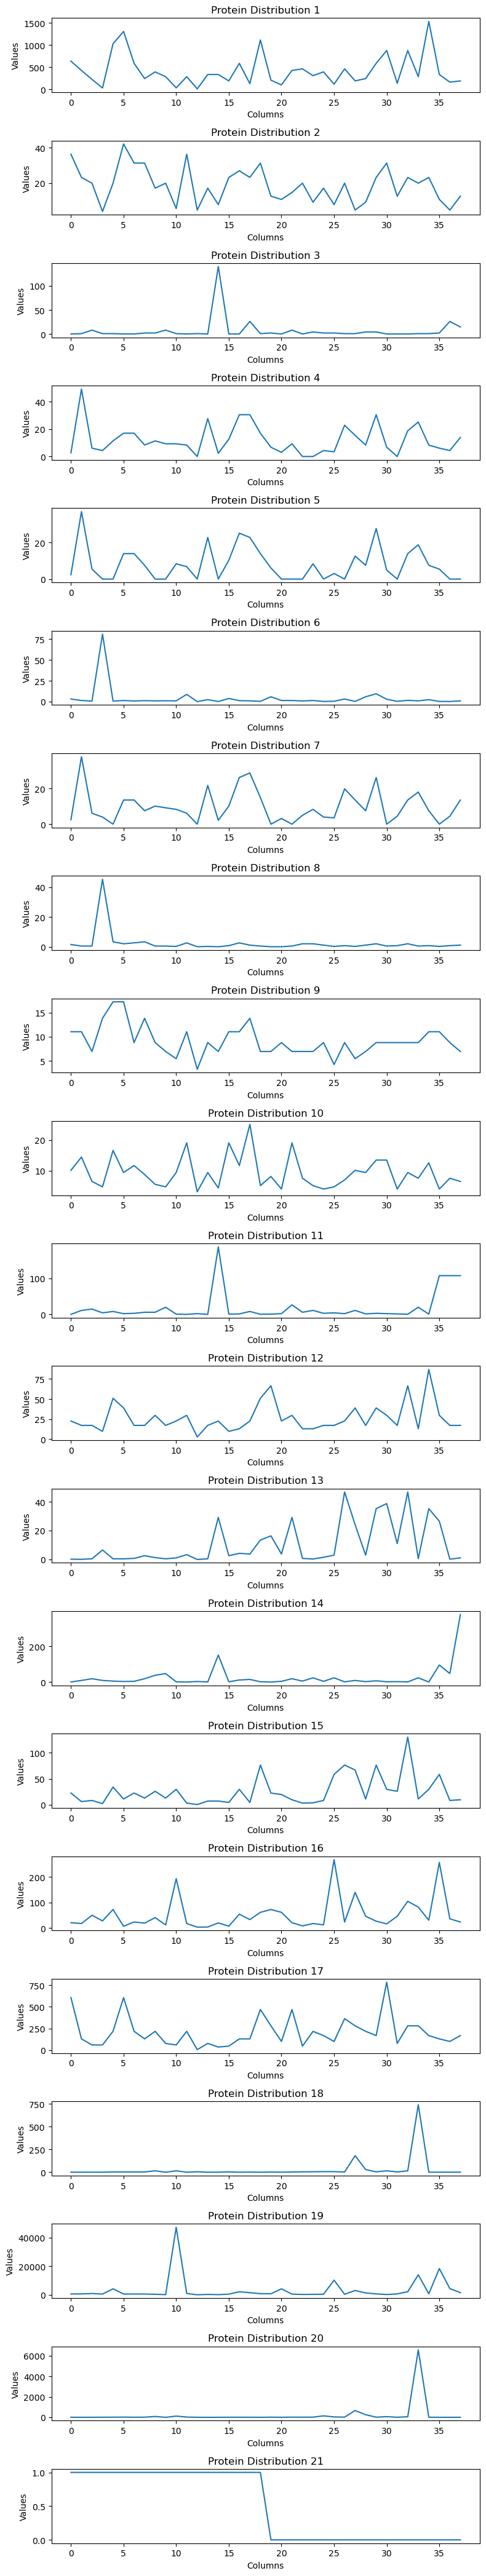

In [122]:
num_rows = len(graphing)
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 2 * num_rows)) # Create subplots

for i in range(num_rows):
    row = graphing.iloc[i]
    axes[i].plot(row.index, row.values) 
    axes[i].set_title(f'Protein Distribution {i+1}')
    axes[i].set_xlabel('Columns')
    axes[i].set_ylabel('Values')

plt.tight_layout() 
plt.show();